In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, Markdown


In [12]:
df = pd.read_csv("Heart Prediction Quantum Dataset.csv")
df.head()
df.info()
df.describe()
df['HeartDisease'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


HeartDisease
1    300
0    200
Name: count, dtype: int64

## 📊 Data Overview
We use a dataset containing 500 patient records with attributes like age, cholesterol, and a synthetic `QuantumPatternFeature`. The target is `HeartDisease` (1 = Yes, 0 = No).


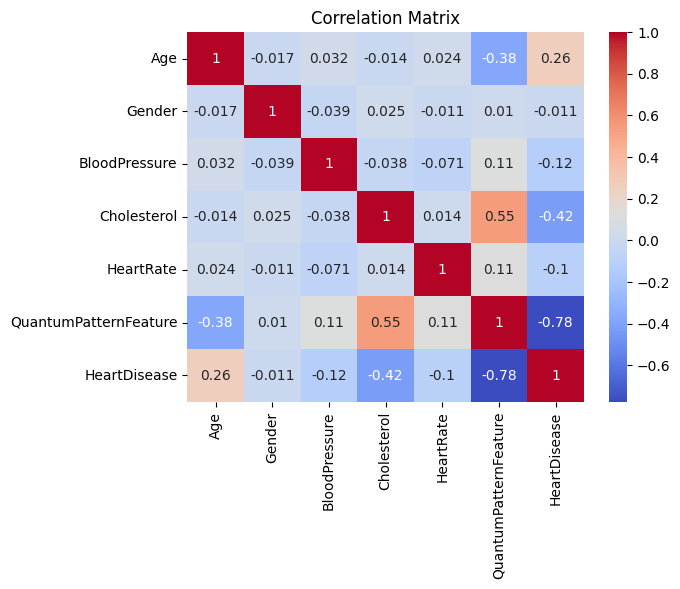

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


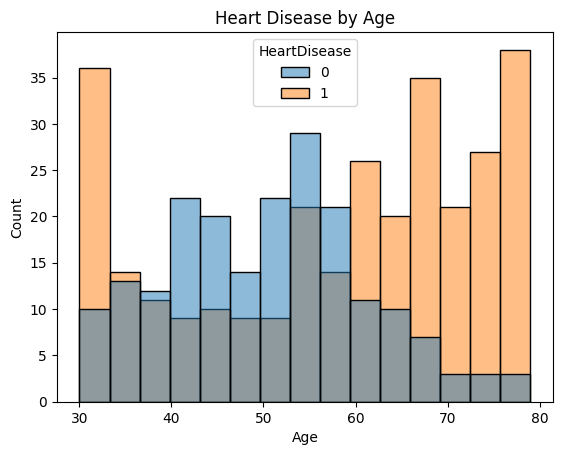

In [14]:
sns.histplot(data=df, x="Age", hue="HeartDisease", bins=15)
plt.title("Heart Disease by Age")
plt.show()


In [15]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Below youll find a visualization of the Random forrest classifer used to train the model

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.88      0.94        60

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



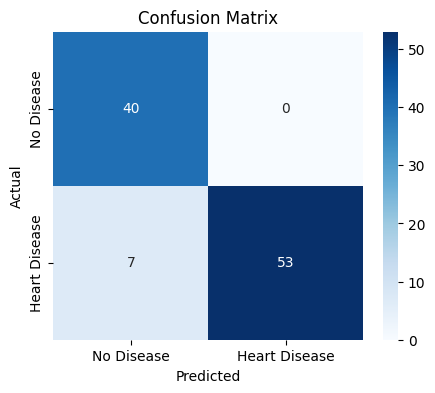

In [17]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ✅ Model Evaluation
The Random Forest model achieved an accuracy of ~95% with balanced precision and recall. Above is the confusion matrix and classification report.


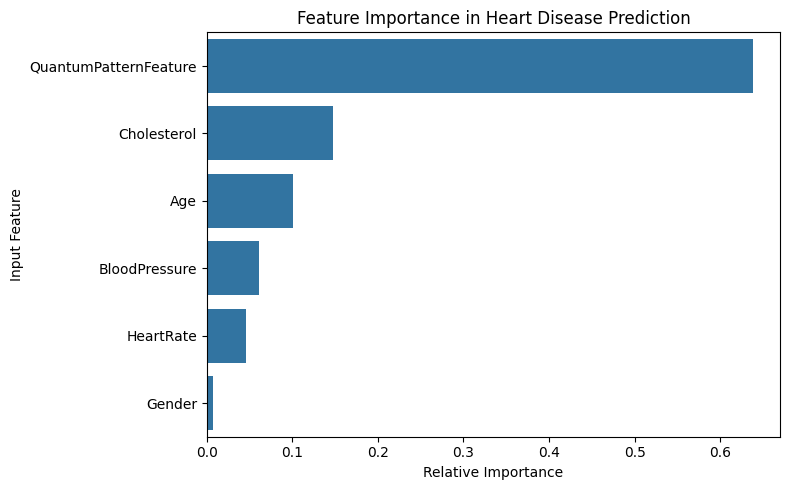

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare importances
importances = model.feature_importances_
features = X.columns

# DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')  # Removed palette
plt.title('Feature Importance in Heart Disease Prediction')    # Removed emoji
plt.xlabel('Relative Importance')
plt.ylabel('Input Feature')
plt.tight_layout()
plt.show()

plt.show()


## 🎯 Interactive Heart Disease Risk Predictor
Use the sliders below to simulate patient data and instantly receive a prediction.


In [25]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, Markdown
from sklearn.ensemble import RandomForestClassifier

age = widgets.IntSlider(description="Age", min=1, max=80, value=50)
gender = widgets.Dropdown(description="Gender", options=[('Female', 0), ('Male', 1)])
bp = widgets.IntSlider(description="Blood Pressure", min=90, max=180, value=120)
chol = widgets.IntSlider(description="Cholesterol", min=150, max=300, value=200)
hr = widgets.IntSlider(description="Heart Rate", min=60, max=120, value=80)
quantum = widgets.FloatSlider(description="Quantum Feature", min=6.0, max=11.0, value=8.5)


output = widgets.Output()

btn = widgets.Button(description="Check Prediction", button_style="success")

def on_click(b):
    input_data = pd.DataFrame([[
        age.value,
        gender.value,
        bp.value,
        chol.value,
        hr.value,
        quantum.value
    ]], columns=['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature'])
    
    result = model.predict(input_data)[0]
    
    with output:
        output.clear_output()
        if result == 1:
            display(Markdown("### 🎯 Result: 🔴 **Heart Disease Detected**"))
        else:
            display(Markdown("### 🎯 Result: 🟢 **No Heart Disease**"))

btn.on_click(on_click)

form = widgets.VBox([age, gender, bp, chol, hr, quantum, btn, output])
display(Markdown("## 🧠 Heart Disease Predictor"))
display(form)


## 🧠 Heart Disease Predictor